In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape


(50000, 32, 32, 3)

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


x_train=x_train/225
x_test=x_test/255


In [6]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
print(x_train.shape[1:])

(32, 32, 3)


In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

In [9]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.4)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
Dropout(0.5)
model.add(Dense(10,activation='softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [13]:
model.compile(loss='categorical_crossentropy',  optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64,verbose=1,validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 117s 185ms/step - loss: 0.9510 - accuracy: 0.6624 - val_loss: 0.8768 - val_accuracy: 0.6841
Epoch 2/20
625/625 [==============================] - 94s 150ms/step - loss: 0.7857 - accuracy: 0.7261 - val_loss: 0.8231 - val_accuracy: 0.7122
Epoch 3/20
625/625 [==============================] - 85s 135ms/step - loss: 0.6772 - accuracy: 0.7611 - val_loss: 0.7539 - val_accuracy: 0.7437
Epoch 4/20
625/625 [==============================] - 82s 132ms/step - loss: 0.5807 - accuracy: 0.7966 - val_loss: 0.7227 - val_accuracy: 0.7536
Epoch 5/20
625/625 [==============================] - 89s 142ms/step - loss: 0.4777 - accuracy: 0.8320 - val_loss: 0.7731 - val_accuracy: 0.7493
Epoch 6/20
625/625 [==============================] - 80s 128ms/step - loss: 0.4079 - accuracy: 0.8545 - val_loss: 0.7846 - val_accuracy: 0.7518
Epoch 7/20
625/625 [==============================] - 79s 126ms/step - loss: 0.3289 - accuracy: 0.8820 - val_loss: 0.8292 - val_a

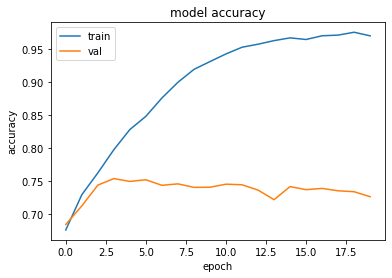

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


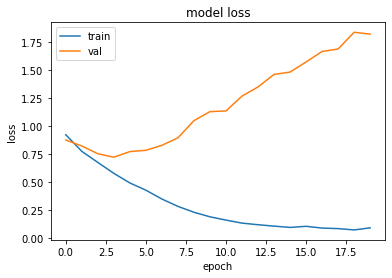

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


In [16]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.7090373039245605
Test accuracy: 0.724399983882904


In [19]:
model1=Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32,32,3), activation='relu'))
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)        

In [21]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model1.compile(loss='categorical_crossentropy',  optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model1.fit(x_train, y_train, epochs=20, batch_size=64,verbose=1,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
625/625 [==============================] - 84s 132ms/step - loss: 0.7533 - accuracy: 0.7404 - val_loss: 0.7043 - val_accuracy: 0.7550
Epoch 2/20
625/625 [==============================] - 82s 132ms/step - loss: 0.7222 - accuracy: 0.7451 - val_loss: 0.7308 - val_accuracy: 0.7482
Epoch 3/20
625/625 [==============================] - 83s 132ms/step - loss: 0.7047 - accuracy: 0.7524 - val_loss: 0.6773 - val_accuracy: 0.7661
Epoch 4/20
625/625 [==============================] - 85s 136ms/step - loss: 0.6715 - accuracy: 0.7643 - val_loss: 0.6777 - val_accuracy: 0.7622
Epoch 5/20
625/625 [==============================] - 87s 140ms/step - loss: 0.6628 - accuracy: 0.7684 - val_loss: 0.6780 - val_accuracy: 0.7670


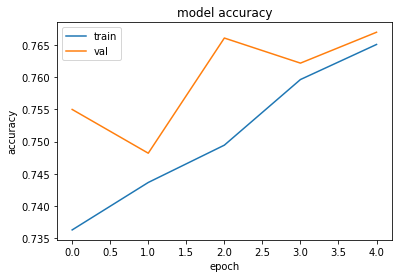

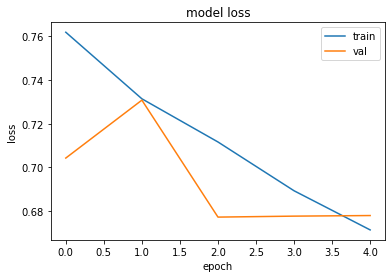

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


In [30]:
test_eval1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.7090373039245605
Test accuracy: 0.724399983882904


In [28]:
model.compile(loss='categorical_crossentropy',  optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64,verbose=1,validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 92s 130ms/step - loss: 0.2840 - accuracy: 0.9336 - val_loss: 1.1667 - val_accuracy: 0.7488
Epoch 2/5
704/704 [==============================] - 91s 129ms/step - loss: 0.1023 - accuracy: 0.9702 - val_loss: 1.3599 - val_accuracy: 0.7504
Epoch 3/5
704/704 [==============================] - 95s 135ms/step - loss: 0.0729 - accuracy: 0.9784 - val_loss: 1.4475 - val_accuracy: 0.7516
Epoch 4/5
704/704 [==============================] - 99s 141ms/step - loss: 0.0734 - accuracy: 0.9761 - val_loss: 1.4882 - val_accuracy: 0.7430
Epoch 5/5
704/704 [==============================] - 98s 139ms/step - loss: 0.0707 - accuracy: 0.9772 - val_loss: 1.6114 - val_accuracy: 0.7574


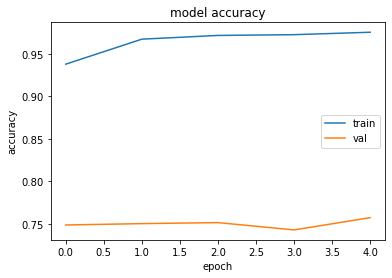

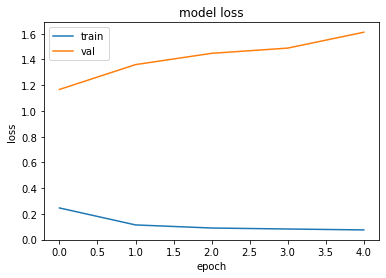

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()